# Capstone Project: Zomato Spatial Data Analysis and Rating Prediction

## Part 1: Introduction

In this capstone project, we will explore and analyze the Zomato dataset, which contains information about various restaurants. The goal is to gain insights into the data, perform exploratory data analysis (EDA), and build a machine learning model to predict restaurant ratings based on selected features.

### Import Necessary Packages

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Data

In [154]:
data = pd.read_csv('zomato.csv')

### Data Exploration and Overview

Explore the basic characteristics of the dataset to understand its structure.

In [155]:
# Display the first 3 rows of the dataset
data.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari


In [156]:
# Display the columns of the dataset
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [171]:
len(df.select_dtypes(include='object').columns)

16

In [172]:
len(df.select_dtypes(include=['int64', 'float64']).columns)

2

In [157]:
# Display the dimensions of the dataset
data.shape

(51717, 17)

In [158]:
# Display information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [159]:
# Display the data types of columns
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [160]:
# Display summary statistics of the numeric column 'votes'
data.describe()

,votes
count,51717.000000
mean,283.697527
std,803.838853
min,0.000000
25%,7.000000
50%,41.000000
75%,198.000000
max,16832.000000


## Part 2: Data Cleaning and Preprocessing

In [161]:
# Drop duplicates
data.drop_duplicates(inplace=True)

In [163]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [164]:
# Drop rows with missing values in the 'location' feature
data.dropna(subset=['location'], inplace=True)

In [165]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


## Part 3: Data Visualization (EDA)

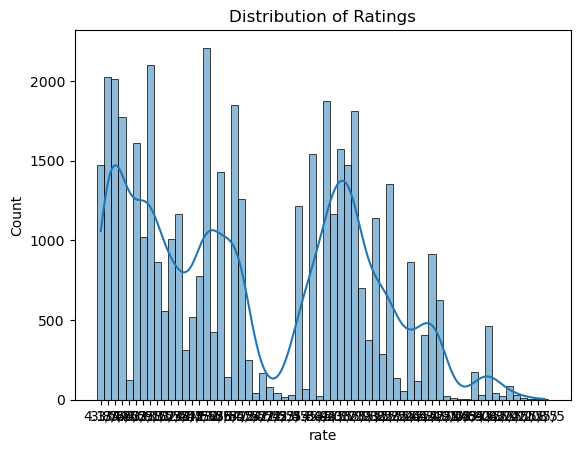

In [167]:
# Visualize the distribution of ratings
sns.histplot(data['rate'], bins=50, kde=True)
plt.title('Distribution of Ratings')
plt.show()

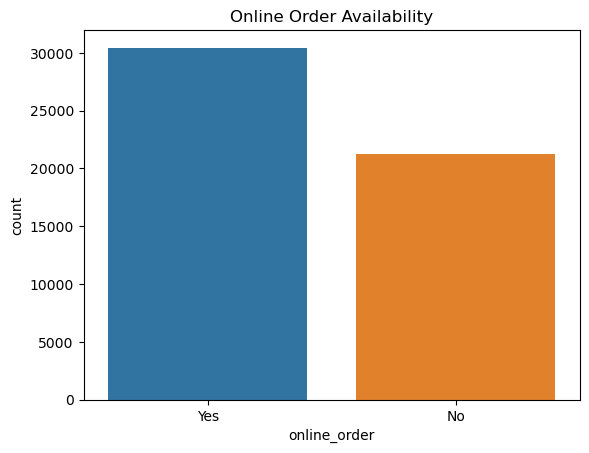

In [168]:
# Countplot for online order availability
sns.countplot(x='online_order', data=data)
plt.title('Online Order Availability')
plt.show()

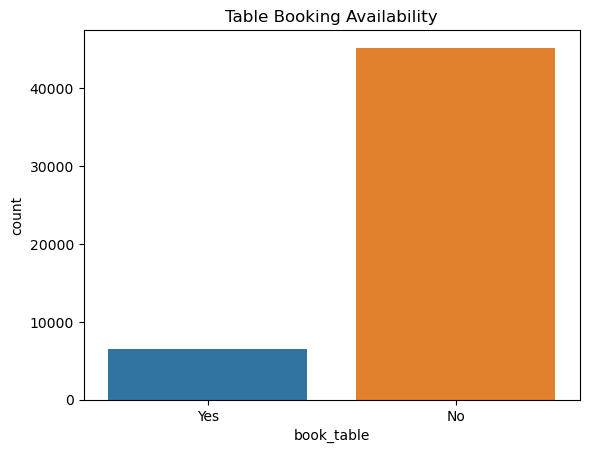

In [169]:
# Countplot for table booking availability
sns.countplot(x='book_table', data=data)
plt.title('Table Booking Availability')
plt.show()

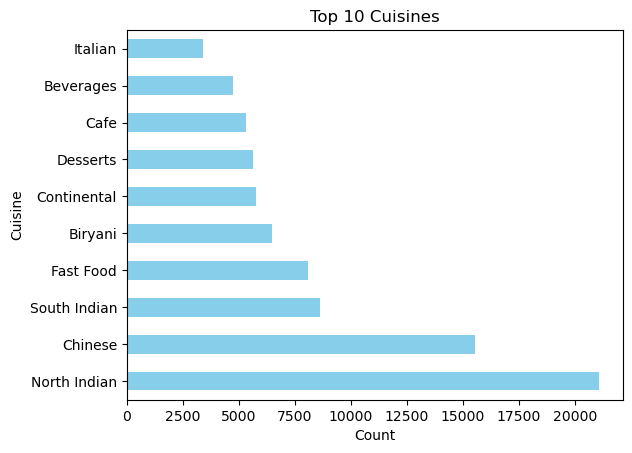

In [170]:
# Extract and count unique cuisines
cuisines = data['cuisines'].str.split(', ', expand=True).stack().value_counts()

# Plot the top cuisines
cuisines.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Cuisines')
plt.xlabel('Count')
plt.ylabel('Cuisine')
plt.show()

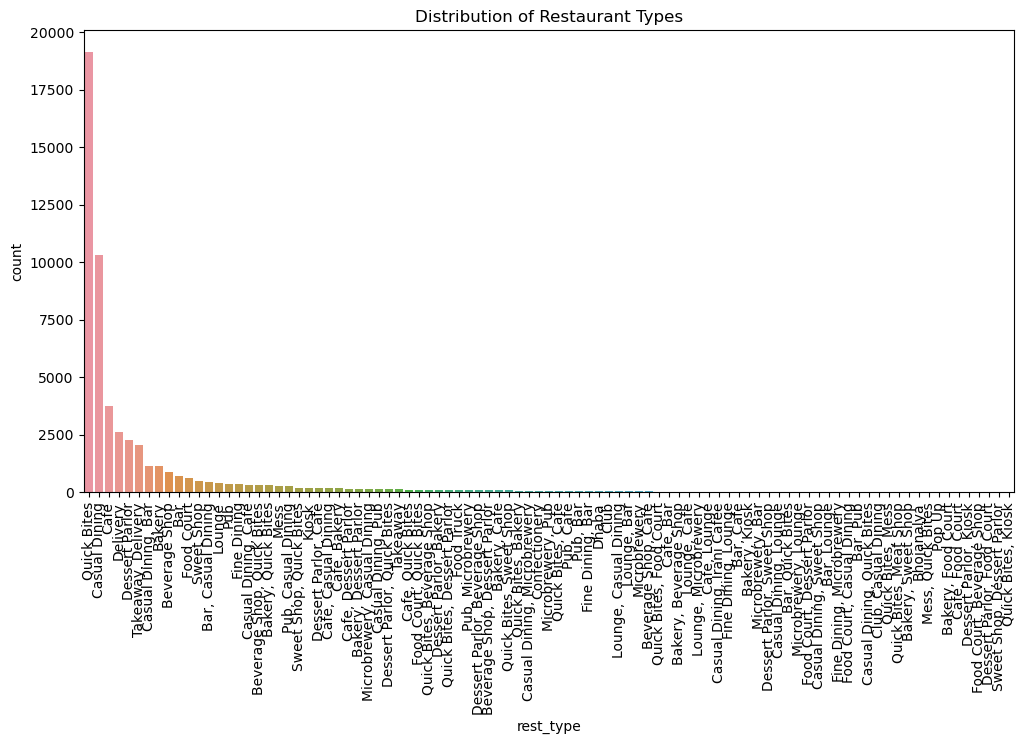

In [139]:
# Countplot for restaurant types
plt.figure(figsize=(12, 6))
sns.countplot(x='rest_type', data=data, order=data['rest_type'].value_counts().index)
plt.title('Distribution of Restaurant Types')
plt.xticks(rotation=90)
plt.show()

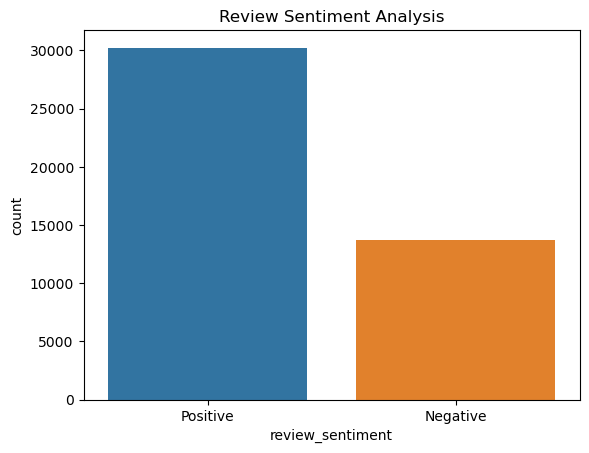

In [141]:
# Create a new column for sentiment analysis
data['review_sentiment'] = df['reviews_list'].apply(lambda x: 'Positive' if 'Rated 4.0' in x else 'Negative')

# Countplot for review sentiment
sns.countplot(x='review_sentiment', data=data)
plt.title('Review Sentiment Analysis')
plt.show()


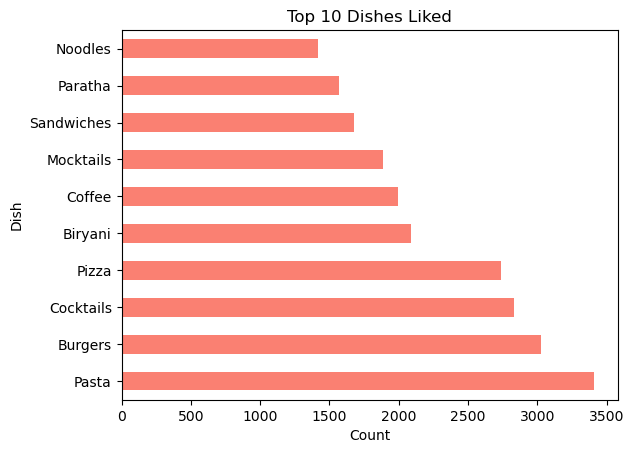

In [143]:
# Extract and count unique dishes liked
dishes_liked = data['dish_liked'].str.split(', ', expand=True).stack().value_counts()

# Plot the top liked dishes
dishes_liked.head(10).plot(kind='barh', color='salmon')
plt.title('Top 10 Dishes Liked')
plt.xlabel('Count')
plt.ylabel('Dish')
plt.show()

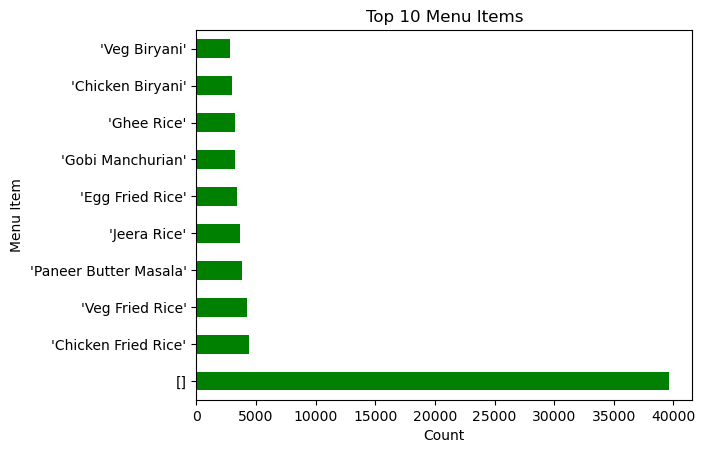

In [146]:
# Extract and count unique menu items
menu_items = data['menu_item'].str.split(', ', expand=True).stack().value_counts()

# Plot the top menu items
menu_items.head(10).plot(kind='barh', color='green')
plt.title('Top 10 Menu Items')
plt.xlabel('Count')
plt.ylabel('Menu Item')
plt.show()

## Part 4: Spatial Analysis

In [295]:
df = data.copy() ## creating copy of "data" into "df" ,so that whatever manipulations we will do , we will do on top of df

In [296]:
### Lets make every place more readible so that u will get more more accurate geographical co-ordinates..

In [297]:
df['location'] = df['location'] + ' , Bangalore , Karnataka , India'

In [298]:
df['location']

0             Banashankari , Bangalore , Karnataka , India
1             Banashankari , Bangalore , Karnataka , India
2             Banashankari , Bangalore , Karnataka , India
3             Banashankari , Bangalore , Karnataka , India
4             Basavanagudi , Bangalore , Karnataka , India
                               ...                        
51712           Whitefield , Bangalore , Karnataka , India
51713           Whitefield , Bangalore , Karnataka , India
51714           Whitefield , Bangalore , Karnataka , India
51715    ITPL Main Road, Whitefield , Bangalore , Karna...
51716    ITPL Main Road, Whitefield , Bangalore , Karna...
Name: location, Length: 51717, dtype: object

In [299]:
df.dtypes ## various data-types

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

## Extract Latitudes & longitudes from data..

In [301]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [302]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [303]:
rest_loc = pd.DataFrame() ## creating dataframe of all the unique locations of Bengalore

In [304]:
rest_loc['Name'] = df['location'].unique()

In [305]:
rest_loc.head(3)

,Name
0,"Banashankari , Bangalore , Karnataka , India"
1,"Basavanagudi , Bangalore , Karnataka , India"
2,"Mysore Road , Bangalore , Karnataka , India"


In [306]:
!pip install geopy

In [307]:
from geopy.geocoders import Nominatim

### Nominatim is a tool to search OpenStreetMap data by address or location

In [308]:
geolocator = Nominatim(user_agent="app" , timeout=None ) ## set timeout=None to get rid of timeout error

In [309]:
lat = [] ## define lat list to store all the latitudes
lon = [] ## define lon list to store all the longitudes


for name in rest_loc['Name']:
    location = geolocator.geocode(name)
    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
        
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [310]:
print(lat)

[12.9152242, 12.9417261, 12.9466619, 12.9292731, 12.9081487, 12.9274413, 12.9660722, 12.9055682, 12.9120761, 12.9287596, 12.965717999999999, 12.96757385, 12.9211978, 12.911275849999999, 12.8705815, 12.9089453, 46.3144754, 12.9854892, 12.848759900000001, 12.9116225, 12.9552572, 12.9244365, 12.9489339, 12.9575547, 12.9348429, 12.9408685, 12.9668233, 12.9364846, 13.0464531, 12.9327778, 12.93103185, 12.9696365, 13.001147, 12.959429, 12.9732913, 12.9277245, 12.9986827, 13.0227204, 12.9755264, 12.9750849, 12.9749487, 12.9756281, 12.9778793, 13.0530002, 12.986391, 12.9802639, 12.9744255, 12.987043, 12.9843066, 12.9822324, 12.988721250000001, 13.0358698, 12.9624669, 12.945245, 12.9678074, 12.9968004, 13.0027353, 12.9931876, 13.0093455, 12.9390255, 12.978129800000001, 12.957998, 12.97339325, 12.9578658, 12.9668213, 12.9874878, 12.9413238, 13.007516, 12.9243692, 12.9282918, 12.9340114, 12.9225657, 12.9882338, 13.0141618, 13.022234699999998, 13.0422794, 13.0258087, 13.0221416, 13.0437655, 13.0784

In [311]:
rest_loc['lat'] = lat
rest_loc['lon'] = lon

In [312]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.915224,77.573579
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
89,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
90,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
91,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
92,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [313]:
rest_loc.isnull().sum() ## checking missing values in a rest_loc dataframe..

Name    1
lat     2
lon     2
dtype: int64

In [314]:
rest_loc['lat'].isnull()

0     False
1     False
2     False
3     False
4     False
      ...  
89    False
90    False
91    False
92    False
93    False
Name: lat, Length: 94, dtype: bool

In [315]:
rest_loc[rest_loc['lat'].isnull()]

,Name,lat,lon
80,"Rammurthy Nagar , Bangalore , Karnataka , India",NaN,NaN
86,"Sadashiv Nagar , Bangalore , Karnataka , India",NaN,NaN


In [316]:

### lets take help of google in such circumstances..
### google as "co-ordinates of St. Marks Road , Bangalore" & find co-ordinates as :

In [317]:
rest_loc['lat'][45] = 12.9764122

In [318]:
rest_loc['lat'][45]

12.9764122

In [319]:
rest_loc['lon'][45]  =77.6017437

In [320]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [321]:
### for Rammurthy Nagar , Bangalore
### 13.0163° N, 77.6785° E

In [322]:
rest_loc['lat'][79] = 13.0163
rest_loc['lon'][79] = 77.6785

In [323]:
### for Sadashiv Nagar ,
### 13.0068 (Lat) & 77.5813(Lon)

In [324]:
rest_loc['lat'][85] = 13.0068
rest_loc['lon'][85] = 77.5813

In [325]:
rest_loc.isnull().sum()

Name    1
lat     2
lon     2
dtype: int64

## Writing Structured Queries to extract Latutudes & Longitudes

In [402]:
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1


In [405]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                               0
votes                              0
phone                            832
location                           0
rest_type                        151
dish_liked                     20333
cuisines                          11
approx_cost(for two people)      252
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
rating                             0
dtype: int64

In [406]:
geolocator = Nominatim(user_agent="app" , timeout=None )

In [407]:
df['address'][0]

'942, 21st Main Road, 2nd Stage, Banashankari, Bangalore'

In [408]:
loc = geolocator.geocode(df['address'][0])

In [409]:
hasattr(loc , 'latitude')


## hasattr(loc,'latitude')  Return whether the loc has an attribute of latitude or not..

### it means address doesn't have any property as latitude , ie it is unable to find any geo-graphical for address feature..

False

#### now how to find geo-graphical co-ordinates of address feature..

In [410]:
address = {'street':'21st Main Road' , 'city':'Bangalore' , 'country':'India' , 'state':'Karnataka'}

In [411]:
address_geocode = geolocator.geocode(address)

In [412]:
hasattr(address_geocode , 'latitude')

True

In [413]:
hasattr(address_geocode , 'longitude')

True

In [414]:
address_geocode.latitude

12.9113653

In [415]:
address_geocode.longitude

77.587742

## Where are most number of restaurants located in Bengalore ?

In [416]:
df['location'].value_counts()

location
BTM , Bangalore , Karnataka , India                      4261
Koramangala 5th Block , Bangalore , Karnataka , India    2381
HSR , Bangalore , Karnataka , India                      2128
Indiranagar , Bangalore , Karnataka , India              1936
JP Nagar , Bangalore , Karnataka , India                 1849
                                                         ... 
West Bangalore , Bangalore , Karnataka , India              5
Yelahanka , Bangalore , Karnataka , India                   5
Rajarajeshwari Nagar , Bangalore , Karnataka , India        2
Nagarbhavi , Bangalore , Karnataka , India                  1
Peenya , Bangalore , Karnataka , India                      1
Name: count, Length: 92, dtype: int64

In [417]:
type(df['location'].value_counts())

pandas.core.series.Series

In [418]:
Rest_locations = df['location'].value_counts().reset_index()

In [419]:
Rest_locations.columns = ['Name' , 'count']

In [420]:
Rest_locations

,Name,count
0,"BTM , Bangalore , Karnataka , India",4261
1,"Koramangala 5th Block , Bangalore , Karnataka ...",2381
2,"HSR , Bangalore , Karnataka , India",2128
3,"Indiranagar , Bangalore , Karnataka , India",1936
4,"JP Nagar , Bangalore , Karnataka , India",1849
...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",5
88,"Yelahanka , Bangalore , Karnataka , India",5
89,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2
90,"Nagarbhavi , Bangalore , Karnataka , India",1


In [421]:
### Now we can say that These are my locations where most of my restaurants are located..

In [422]:
'''

lets create Heatmap of this results so that it becomes more user-friendly..
now In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..

'''

'\n\nlets create Heatmap of this results so that it becomes more user-friendly..\nnow In order to perform Spatial Anlysis(Geographical Analysis) , we need latitudes & longitudes of every location..\n\n'

In [423]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.915224,77.573579
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
89,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
90,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
91,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
92,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [424]:
### so lets merge both the dataframes or append one into another in order to get geographical co-ordinates..

In [425]:
Beng_rest_locations = Rest_locations.merge(rest_loc , on="Name")

In [426]:
type(Beng_rest_locations)

pandas.core.frame.DataFrame

In [427]:
Beng_rest_locations.head(5)

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",4261,12.911276,77.604565
1,"Koramangala 5th Block , Bangalore , Karnataka ...",2381,12.934843,77.618977
2,"HSR , Bangalore , Karnataka , India",2128,12.911623,77.638862
3,"Indiranagar , Bangalore , Karnataka , India",1936,12.973291,77.640467
4,"JP Nagar , Bangalore , Karnataka , India",1849,12.912076,77.579393


In [349]:
!pip install folium

In [428]:
import folium

In [429]:
def Generate_basemap():
    basemap = folium.Map(location=[12.97 , 77.59])
    return basemap

In [430]:
basemap = Generate_basemap()

#### now in order to show-case it via Map(Heatmap) ,first we need to create BaseMap so that I can map our Heatmap on top of BaseMap !

In [431]:
### Geographic heat maps are used to identify where something occurs, and demonstrate areas of high and low density...

from folium.plugins import HeatMap

In [432]:
Beng_rest_locations.columns

Index(['Name', 'count', 'lat', 'lon'], dtype='object')

In [433]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,4261
1,12.934843,77.618977,2381
2,12.911623,77.638862,2128
3,12.973291,77.640467,1936
4,12.912076,77.579393,1849
...,...,...,...
87,13.022235,77.567183,5
88,13.100698,77.596345,5
89,12.927441,77.515522,2
90,12.967574,77.511801,1


In [436]:
print(Beng_rest_locations[['lat', 'lon']].isnull().sum())

lat    2
lon    2
dtype: int64


In [494]:
Beng_rest_locations = Beng_rest_locations.dropna(subset=['lat', 'lon'])

In [495]:
Beng_rest_locations[['lat', 'lon']] = Beng_rest_locations[['lat', 'lon']].fillna(Beng_rest_locations[['lat', 'lon']].mean())


In [496]:
Beng_rest_locations[['lat', 'lon']] = Beng_rest_locations[['lat', 'lon']].apply(pd.to_numeric, errors='coerce')


In [497]:
HeatMap(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [498]:
basemap

### Conclusions : in the city centre area , majority of the Restaurants are avaiable :

## Performing Marker Cluster Analysis !
        Similar to previous one , but just use Marker Cluster 

In [499]:
from folium.plugins import FastMarkerCluster

In [500]:
basemap = Generate_basemap()

In [451]:
Beng_rest_locations[['lat', 'lon' , 'count']]

,lat,lon,count
0,12.911276,77.604565,4261
1,12.934843,77.618977,2381
2,12.911623,77.638862,2128
3,12.973291,77.640467,1936
4,12.912076,77.579393,1849
...,...,...,...
87,13.022235,77.567183,5
88,13.100698,77.596345,5
89,12.927441,77.515522,2
90,12.967574,77.511801,1


In [501]:
FastMarkerCluster(Beng_rest_locations[['lat', 'lon' , 'count']]).add_to(basemap)

In [453]:
basemap

## Plotting all the markers of places of Bangalore !

Plotting Markers on the Map :

    Folium gives a folium.Marker() class for plotting markers on a map
    Just pass the latitude and longitude of the location, mention the popup and tooltip and add it to the map.

#### Plotting markers is a two-step process.
    1) you need to create a base map on which your markers will be placed
    2) and then add your markers to it:

In [454]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",4261,12.911276,77.604565
1,"Koramangala 5th Block , Bangalore , Karnataka ...",2381,12.934843,77.618977
2,"HSR , Bangalore , Karnataka , India",2128,12.911623,77.638862
3,"Indiranagar , Bangalore , Karnataka , India",1936,12.973291,77.640467
4,"JP Nagar , Bangalore , Karnataka , India",1849,12.912076,77.579393
...,...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",5,13.022235,77.567183
88,"Yelahanka , Bangalore , Karnataka , India",5,13.100698,77.596345
89,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522
90,"Nagarbhavi , Bangalore , Karnataka , India",1,12.967574,77.511801


In [455]:
m = Generate_basemap() ## it will generate basemap

In [456]:
m

In [457]:
Beng_rest_locations

,Name,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",4261,12.911276,77.604565
1,"Koramangala 5th Block , Bangalore , Karnataka ...",2381,12.934843,77.618977
2,"HSR , Bangalore , Karnataka , India",2128,12.911623,77.638862
3,"Indiranagar , Bangalore , Karnataka , India",1936,12.973291,77.640467
4,"JP Nagar , Bangalore , Karnataka , India",1849,12.912076,77.579393
...,...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",5,13.022235,77.567183
88,"Yelahanka , Bangalore , Karnataka , India",5,13.100698,77.596345
89,"Rajarajeshwari Nagar , Bangalore , Karnataka ,...",2,12.927441,77.515522
90,"Nagarbhavi , Bangalore , Karnataka , India",1,12.967574,77.511801


In [458]:
# Add points to the map

for index , row in Beng_rest_locations.iterrows():
    folium.Marker(location = [row['lat'] , row['lon']] , popup=row['count']).add_to(m)

In [368]:
m

## Data cleaning in rate !
        In order to Analyse where are the restaurants situated with high average rate , 
        first we need to clean 'rate' feature ..

In [459]:
df.head(3)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8


In [460]:
df['rate']

0         4.1/5
1         4.1/5
2         3.8/5
3         3.7/5
4         3.8/5
          ...  
51709    3.7 /5
51711    2.5 /5
51712    3.6 /5
51715    4.3 /5
51716    3.4 /5
Name: rate, Length: 43942, dtype: object

In [502]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [463]:
df['rate'].isnull().sum()

0

In [464]:
df['rate'].isnull().sum()/len(df)*100 ## ie approximately 15% of your rating belongs to missing values..

0.0

In [465]:
df.dropna(subset = ['rate'] , inplace = True)

In [466]:
df['rate'].isnull().sum()

0

In [467]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [468]:
df.replace('NEW' , '0' , inplace=True)
df.replace('-' , '0' , inplace=True)

## Note:the decision of replacing {"New" -> "0"} & ("-" -> "0") can be changed ,as it depends upon domain expertise & your business analyst..

In [469]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', '0', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [470]:
df['rating'] = df['rate'].str.replace('/5' ,'') ## replace "/5" with ''

In [471]:
df['rating']

0         4.1
1         4.1
2         3.8
3         3.7
4         3.8
         ... 
51709    3.7 
51711    2.5 
51712    3.6 
51715    4.3 
51716    3.4 
Name: rating, Length: 43942, dtype: object

In [472]:
df['rating'] = df['rating'].astype(float) ## converting its data-type into float

In [473]:
df['rating'].dtype

dtype('float64')

In [474]:
df['rating'].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 0. , 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2,
       2.3, 4.8, 4.9, 2.1, 2. , 1.8])

## Most highest rated restaurants ?

In [475]:
df.head(4)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city),rating
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,4.1
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,"Banashankari , Bangalore , Karnataka , India",Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,4.1
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,"Banashankari , Bangalore , Karnataka , India","Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,3.8
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,"Banashankari , Bangalore , Karnataka , India",Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,3.7


In [476]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)', 'rating'],
      dtype='object')

In [477]:
grp_df = df.groupby(['location'] , as_index=False).agg({'rating':'mean' , 'name':'size'})

## size tells total order placed at various locations ...
## bcz more number of order means high chances of restaurant being famous or popular !

In [478]:
grp_df.columns = ['Name' , 'avg_rating' , 'count']

In [479]:
grp_df

,Name,avg_rating,count
0,"BTM , Bangalore , Karnataka , India",3.296128,4261
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628
...,...,...,...
87,"West Bangalore , Bangalore , Karnataka , India",2.020000,5
88,"Whitefield , Bangalore , Karnataka , India",3.384170,1693
89,"Wilson Garden , Bangalore , Karnataka , India",3.257635,203
90,"Yelahanka , Bangalore , Karnataka , India",3.640000,5


In [480]:
## lets consider only those restaurants who have send atleast 400 orders !

In [481]:
grp_df['count']>400

0      True
1      True
2      True
3      True
4      True
      ...  
87    False
88     True
89    False
90    False
91    False
Name: count, Length: 92, dtype: bool

In [482]:
temp_df = grp_df[grp_df['count']>400]

In [483]:
temp_df.shape

(35, 3)

In [484]:
temp_df

,Name,avg_rating,count
0,"BTM , Bangalore , Karnataka , India",3.296128,4261
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628
6,"Bellandur , Bangalore , Karnataka , India",3.309833,1078
8,"Brigade Road , Bangalore , Karnataka , India",3.595849,1084
9,"Brookefield , Bangalore , Karnataka , India",3.374699,581
12,"Church Street , Bangalore , Karnataka , India",3.963091,550
15,"Cunningham Road , Bangalore , Karnataka , India",3.901053,475


In [485]:
rest_loc

,Name,lat,lon
0,"Banashankari , Bangalore , Karnataka , India",12.915224,77.573579
1,"Basavanagudi , Bangalore , Karnataka , India",12.941726,77.575502
2,"Mysore Road , Bangalore , Karnataka , India",12.946662,77.530090
3,"Jayanagar , Bangalore , Karnataka , India",12.929273,77.582423
4,"Kumaraswamy Layout , Bangalore , Karnataka , I...",12.908149,77.555318
...,...,...,...
89,"West Bangalore , Bangalore , Karnataka , India",13.022235,77.567183
90,"Magadi Road , Bangalore , Karnataka , India",12.975653,77.555355
91,"Yelahanka , Bangalore , Karnataka , India",13.100698,77.596345
92,"Sahakara Nagar , Bangalore , Karnataka , India",13.062147,77.580061


In [486]:
### lets merge both the dataframe so that we can get "latitudes" & "Longitudes" as well !

In [487]:
Ratings_locations = temp_df.merge(rest_loc , on='Name')

In [488]:
Ratings_locations

,Name,avg_rating,count,lat,lon
0,"BTM , Bangalore , Karnataka , India",3.296128,4261,12.911276,77.604565
1,"Banashankari , Bangalore , Karnataka , India",3.373292,805,12.915224,77.573579
2,"Banaswadi , Bangalore , Karnataka , India",3.362926,499,13.014162,77.651854
3,"Bannerghatta Road , Bangalore , Karnataka , India",3.271677,1324,12.921198,77.600222
4,"Basavanagudi , Bangalore , Karnataka , India",3.478185,628,12.941726,77.575502
5,"Bellandur , Bangalore , Karnataka , India",3.309833,1078,12.931032,77.678247
6,"Brigade Road , Bangalore , Karnataka , India",3.595849,1084,12.975085,77.607934
7,"Brookefield , Bangalore , Karnataka , India",3.374699,581,12.966821,77.716889
8,"Church Street , Bangalore , Karnataka , India",3.963091,550,12.975628,77.602366
9,"Cunningham Road , Bangalore , Karnataka , India",3.901053,475,12.987043,77.594924


In [489]:
basemap = Generate_basemap()

In [490]:
HeatMap(Ratings_locations[['lat', 'lon' , 'avg_rating']]).add_to(basemap)

In [491]:
basemap

## Part 5: Machine Learning Model - Rating Prediction

In [492]:
# Import necessary libraries for machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assuming your data is loaded into a variable named 'data'
# Replace 'your_file_path' with the actual path to your CSV file if needed
data = pd.read_csv('zomato.csv')

# Select relevant columns for the prediction model
selected_columns = ['online_order', 'book_table', 'approx_cost(for two people)', 'votes', 'rate']

# Drop rows with missing values in the selected columns
data_ml = data[selected_columns].dropna()

# Remove commas and convert 'approx_cost(for two people)' to numeric
data_ml['approx_cost(for two people)'] = data_ml['approx_cost(for two people)'].str.replace(',', '').astype(float)

# Extract only the numeric part from 'rate'
data_ml['rate'] = data_ml['rate'].str.extract('(\d+\.\d+)').astype(float)

# Drop any remaining rows with missing values
data_ml = data_ml.dropna()

# Convert categorical columns to numerical using Label Encoding
le = LabelEncoder()
data_ml['online_order'] = le.fit_transform(data_ml['online_order'])
data_ml['book_table'] = le.fit_transform(data_ml['book_table'])

# Split the data into features (X) and target variable (y)
X = data_ml[['online_order', 'book_table', 'approx_cost(for two people)', 'votes']]
y = data_ml['rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(X_test)

# Evaluate the Linear Regression model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

# Initialize and train the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the RandomForestRegressor model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'RandomForestRegressor Mean Squared Error: {mse_rf}')

# Initialize and train the XGBRegressor model
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the XGBRegressor model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f'XGBRegressor Mean Squared Error: {mse_xgb}')


Linear Regression Mean Squared Error: 0.14292151459112631
RandomForestRegressor Mean Squared Error: 0.06197168027100721
XGBRegressor Mean Squared Error: 0.08681643744015179


In [493]:
# Example prediction for a new data point
new_data_point = pd.DataFrame([[1, 1, 1400, 1000]], columns=['online_order', 'book_table', 'approx_cost(for two people)', 'votes'])

# Predict using the Linear Regression model
predicted_rating_linear = linear_model.predict(new_data_point)
print(f'Linear Regression Predicted Rating: {predicted_rating_linear[0]}')

# Predict using the RandomForestRegressor model
predicted_rating_rf = rf_model.predict(new_data_point)
print(f'RandomForestRegressor Predicted Rating: {predicted_rating_rf[0]}')

# Predict using the XGBRegressor model
predicted_rating_xgb = xgb_model.predict(new_data_point)
print(f'XGBRegressor Predicted Rating: {predicted_rating_xgb[0]}')

Linear Regression Predicted Rating: 4.180706980567628
RandomForestRegressor Predicted Rating: 4.219999999999998
XGBRegressor Predicted Rating: 4.13987398147583


# End of the project